<a href="https://colab.research.google.com/github/lalopezabc123/csv/blob/main/Repaso%20R15-12-2022_R_01_UNI_intro_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Suma de cuadrados

sumOfSquares <- function(x,y) {
  x^2 + y^2
}

x = sumOfSquares(1,2);

print(x)

[1] 5


In [3]:
# ---> Kernel R
# Mostrar documentos en mi directorio con
system('ls', intern=TRUE)

# ---> Kernel Python
# Listar paquetes Python instalados 
# !pip --version

[1] "sample_data"

In [4]:
# Para concoer más sobre la función system de R
help(system)

In [5]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [6]:
archivo <- "https://raw.githubusercontent.com/cristiandarioortegayubro/UNI/main/TOTALNSA.csv"

In [7]:
cars <- read_csv(archivo)

New names:
• `` -> `...1`
Rows: 504 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (2): ...1, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
str(cars)

spc_tbl_ [504 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1 : num [1:504] 0 1 2 3 4 5 6 7 8 9 ...
 $ Date : chr [1:504] "1/31/1976" "2/29/1976" "3/31/1976" "4/30/1976" ...
 $ Value: num [1:504] 885 995 1244 1191 1203 ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   Date = col_character(),
  ..   Value = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [13]:
head(cars)

...1,Date,Value
<dbl>,<chr>,<dbl>
0,1/31/1976,885.2
1,2/29/1976,994.7
2,3/31/1976,1243.6
3,4/30/1976,1191.2
4,5/31/1976,1203.2
5,6/30/1976,1254.7


### Transformación dataset


"Convertir la fecha en objeto de tipo fecha"


In [27]:
  cars$Date <- as.Date(cars$Date, format = "%m/%d/%Y")
class(cars$Date)


[1] "Date"

"Ordenar las fechas de manera ascendente"

In [28]:
cars <- cars %>% arrange(Date)
head(cars)



...1,Date,Value
<dbl>,<date>,<dbl>
0,1976-01-31,885.2
1,1976-02-29,994.7
2,1976-03-31,1243.6
3,1976-04-30,1191.2
4,1976-05-31,1203.2
5,1976-06-30,1254.7


"Definir el inicio y fin de nuestra serie de tiempo (ts)"

In [29]:
start_point <- c(1976,01,31)
end_point <- c(2017,12,31)


"Convertir nuestra tabla en un objeto ts"

In [30]:
cars_ts <- ts(data = cars$Value,
              start = start_point,
              frequency = 12)


In [50]:
head(cars_ts, 24)

[1]  885.2  994.7 1243.6 1191.2 1203.2 1254.7 1162.3 1026.1 1057.9 1129.4
[11] 1084.4 1061.8  969.9 1092.1 1451.1 1354.4 1377.1 1459.8 1202.0 1234.5
[21] 1104.6 1341.3 1181.6 1090.6

In [51]:
class(cars_ts)

[1] "ts"

In [54]:
head(cars_ts)

[1]  885.2  994.7 1243.6 1191.2 1203.2 1254.7

In [55]:
cars_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1976,885.2,994.7,1243.6,1191.2,1203.2,1254.7,1162.3,1026.1,1057.9,1129.4,1084.4,1061.8
1977,969.9,1092.1,1451.1,1354.4,1377.1,1459.8,1202.0,1234.5,1104.6,1341.3,1181.6,1090.6
1978,931.3,1071.4,1480.6,1406.5,1557.6,1549.4,1289.2,1317.1,1103.5,1397.0,1248.7,1068.5
1979,1077.5,1148.7,1483.8,1304.6,1373.0,1183.8,1164.4,1207.2,1029.6,1197.6,1018.6,959.7
1980,1042.0,1038.7,1141.9,946.6,893.8,932.7,1006.6,884.2,847.4,1043.4,870.5,821.4
1981,814.3,949.2,1178.8,962.9,933.1,942.7,896.9,1009.0,864.8,822.0,743.0,673.2
1982,714.4,840.5,1057.3,877.2,1020.2,868.4,827.4,794.0,891.1,840.9,971.5,839.3
1983,789.3,821.6,1102.0,1012.3,1109.9,1205.4,1051.7,993.1,980.4,1126.0,1050.2,1054.0
1984,1056.9,1158.9,1351.5,1245.8,1451.7,1315.9,1237.2,1129.6,1053.4,1266.5,1141.1,1074.8
1985,1196.6,1210.6,1391.0,1380.3,1498.9,1332.9,1337.6,1345.8,1463.5,1243.2,1120.9,1198.8


## Análisis exploratorio

"Ver la serie de tiempo"

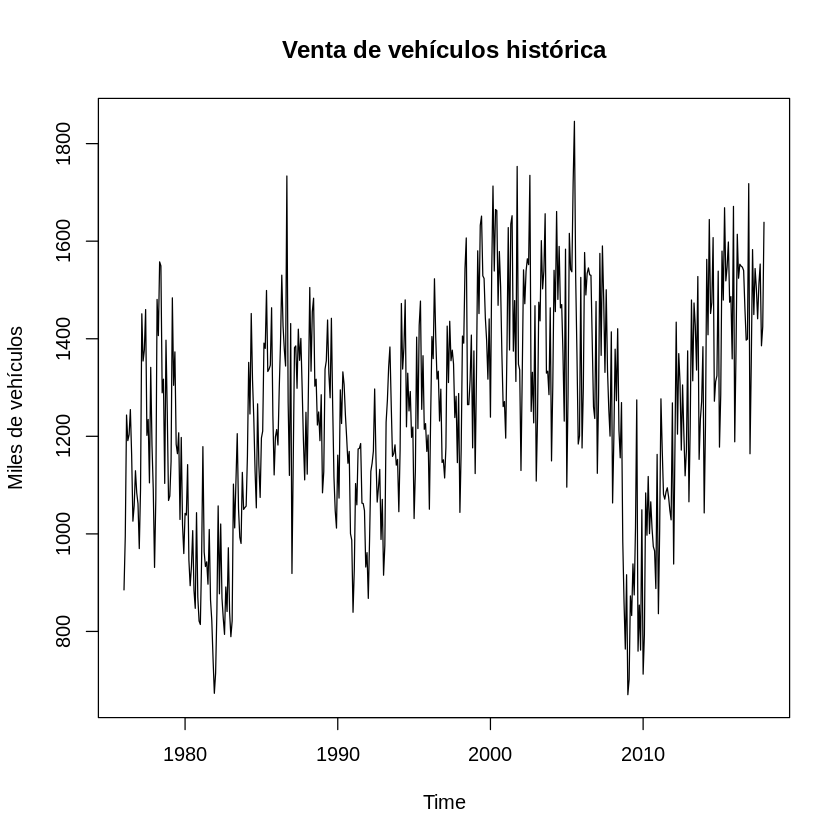

In [62]:
plot.ts(cars_ts,
        main = "Venta de vehículos histórica",
        ylab = "Miles de vehículos")


"Ver la serie de tiempo"

Warning message in plot.window(xlim, ylim, log, ...):
“"title" is not a graphical parameter”
Warning message in plot.window(xlim, ylim, log, ...):
“"Ytitle" is not a graphical parameter”
Warning message in plot.window(xlim, ylim, log, ...):
“"Xgrid" is not a graphical parameter”
Warning message in plot.window(xlim, ylim, log, ...):
“"Ygrid" is not a graphical parameter”
Warning message in plot.window(xlim, ylim, log, ...):
“"slider" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"title" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"Ytitle" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"Xgrid" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"Ygrid" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"slider" is not a graphic

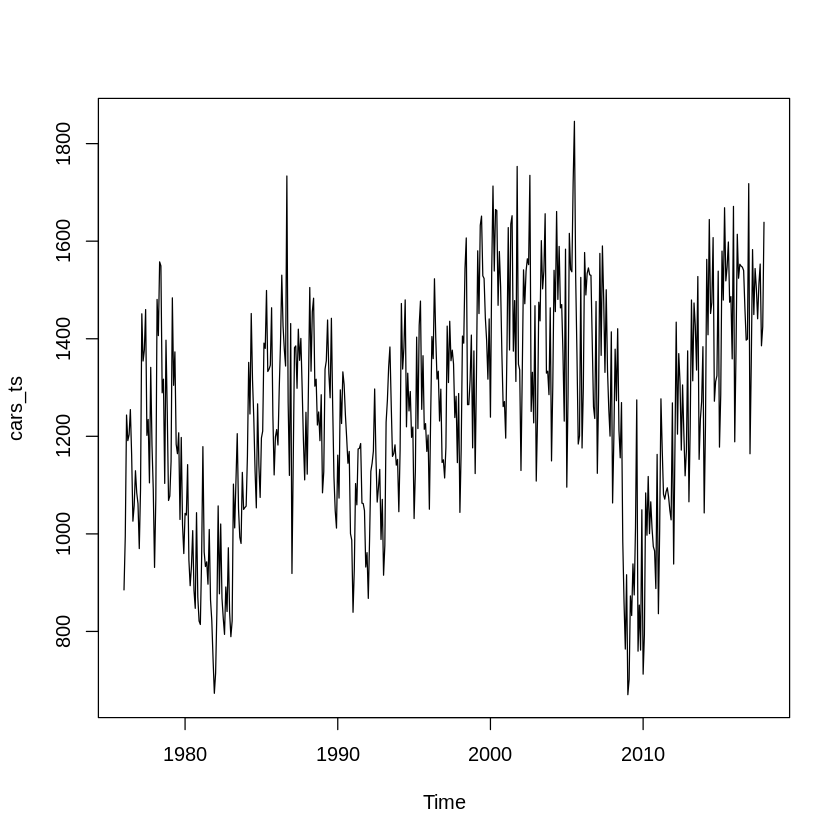

In [73]:
plot.ts(cars_ts,
        title = "Venta de vehículos histórica",
        Ytitle = "Miles de vehículos",
        Xgrid = TRUE,
        Ygrid = TRUE,
        slider = TRUE)

"ver y analizar la estacionalidad"

In [74]:
ts_s(cars_ts, type = "all")



ERROR: ignored